<a href="https://colab.research.google.com/github/juanpalominoh/Fundamentos-de-Econometria/blob/main/Tema_16_Modelos_Probit_y_Logit_Binomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Modelos Probit y Logit Binomial**

In [ ]:
install.packages("rio")      # Instalamos paquete para leer datos
install.packages("skimr")    # Realizar descripción estadística
install.packages("memisc")   # Paquete para realizar tablas

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘openxlsx’




In [ ]:
library(rio)
library(skimr)
library(memisc)

In [ ]:
# Importamos la BBDD
base <- import("/content/base_anemia.dta")
head(base)

,HHID,HVIDX,HWIDX,BORD,sexo,pesoalnacer,edadmeses,edadniño012,edadniño1335,edadniño3659,⋯,lengmaterna,wealth_index,riqueza,region,area,altitud,estrato,V005,peso,anemiamadre
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,000100301,2,1,1,0,3.73,15,0,1,0,⋯,0,3,0.45172107,1,1,2338,3,113988,0.113988,1
2,000100401,1,1,6,0,2.53,22,0,1,0,⋯,1,1,-0.94687147,1,1,2338,3,113988,0.113988,1
3,000100801,2,1,4,1,2.00,18,0,1,0,⋯,1,4,1.28247649,1,1,2338,3,113988,0.113988,0
4,000104201,2,1,1,0,3.10,41,0,0,1,⋯,1,2,0.01761552,1,1,2338,3,113988,0.113988,0
5,000107001,1,1,2,1,2.90,22,0,1,0,⋯,1,3,0.43292466,1,1,2338,3,113988,0.113988,0
6,000205401,4,1,1,0,3.27,37,0,0,1,⋯,1,2,0.09705763,1,1,2338,1,106423,0.106423,0


## **Estadísticas Descriptivas**

In [ ]:
# Estadísticas descriptivas
skimr::skim(base)

── Data Summary ────────────────────────
                           Values
Name                       base  
Number of rows             20466 
Number of columns          27    
_______________________          
Column type frequency:           
  character                1     
  numeric                  26    
________________________         
Group variables            None  

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate min max empty n_unique whitespace
1 HHID                  0             1   9   9     0    17778          0

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable n_missing complete_rate        mean         sd         p0
 1 HVIDX                 0         1          2.24        1.29      1     
 2 HWIDX                 0         1          1.14        0.360     1     
 3 BORD                  0         1          2.42        1.53      1     
 4 sexo

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
“'length(x) = 2 > 1' in coercion to 'logical(1)'”


## **Estimación de los modelos**

Vamos a estimar el siguiente modelo:
\begin{gather*}
anemia_{i} = \beta_{1} + \beta_{2} sexo_i + \beta_{3} edad_i + \beta_{4} pesoalnacer_i + \beta_{5} edadmadre_i + \beta_{6} educmadre_i + \beta_{7} lengmaterna_i + \beta_{8} anemiamadre_i + \beta_{9} area_i + \beta_{10} wealthindex_i + \epsilon_{i}
\end{gather*}

### **Modelo Probabilidad Lineal (MPL)**

In [ ]:
mod_ols <- lm(d_anemia ~ sexo + edadmeses + pesoalnacer + edadmadre + factor(educmadre) + 
  factor(lengmaterna) + anemiamadre + area + factor(wealth_index), data=base)
summary(mod_ols)


Call:
lm(formula = d_anemia ~ sexo + edadmeses + pesoalnacer + edadmadre + 
    factor(educmadre) + factor(lengmaterna) + anemiamadre + area + 
    factor(wealth_index), data = base)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.8496 -0.3258 -0.1596  0.4548  1.0788 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)            0.7866109  0.0277067  28.391  < 2e-16 ***
sexo                  -0.0499668  0.0063828  -7.828 5.21e-15 ***
edadmeses             -0.0088269  0.0001997 -44.205  < 2e-16 ***
pesoalnacer            0.0016082  0.0060805   0.264  0.79141    
edadmadre             -0.0014534  0.0004893  -2.970  0.00298 ** 
factor(educmadre)1     0.0029795  0.0094918   0.314  0.75359    
factor(educmadre)2    -0.0271613  0.0108744  -2.498  0.01251 *  
factor(lengmaterna)1  -0.0941233  0.0122654  -7.674 1.75e-14 ***
factor(lengmaterna)2  -0.0989788  0.0771349  -1.283  0.19944    
anemiamadre            0.1238127  0.0080768  15.329  < 2e

### **Modelo Probit Binomial**

In [ ]:
mod_probit <- glm(d_anemia ~ sexo + edadmeses + pesoalnacer + edadmadre + factor(educmadre) + 
  factor(lengmaterna) + anemiamadre + area + factor(wealth_index), 
  data=base, family=binomial(link="probit"))
summary(mod_probit)


Call:
glm(formula = d_anemia ~ sexo + edadmeses + pesoalnacer + edadmadre + 
    factor(educmadre) + factor(lengmaterna) + anemiamadre + area + 
    factor(wealth_index), family = binomial(link = "probit"), 
    data = base)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9849  -0.8506  -0.5734   1.0660   2.5919  

Coefficients:
                        Estimate Std. Error z value Pr(>|z|)    
(Intercept)            0.8931420  0.0881103  10.137  < 2e-16 ***
sexo                  -0.1560489  0.0204655  -7.625 2.44e-14 ***
edadmeses             -0.0272626  0.0006623 -41.161  < 2e-16 ***
pesoalnacer            0.0062238  0.0194708   0.320  0.74923    
edadmadre             -0.0044673  0.0015651  -2.854  0.00431 ** 
factor(educmadre)1     0.0108447  0.0296887   0.365  0.71490    
factor(educmadre)2    -0.0847472  0.0345187  -2.455  0.01408 *  
factor(lengmaterna)1  -0.2702120  0.0375229  -7.201 5.97e-13 ***
factor(lengmaterna)2  -0.2846491  0.2461920  -1.156  0.24760

### **Modelo Logit Binomial**

In [ ]:
mod_logit <- glm(d_anemia ~ sexo + edadmeses + pesoalnacer + edadmadre + factor(educmadre) + 
  factor(lengmaterna) + anemiamadre + area + factor(wealth_index), 
  data=base, family=binomial(link="logit"))
summary(mod_logit)


Call:
glm(formula = d_anemia ~ sexo + edadmeses + pesoalnacer + edadmadre + 
    factor(educmadre) + factor(lengmaterna) + anemiamadre + area + 
    factor(wealth_index), family = binomial(link = "logit"), 
    data = base)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.9900  -0.8411  -0.5714   1.0551   2.4948  

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)            1.534617   0.148245  10.352  < 2e-16 ***
sexo                  -0.267124   0.034525  -7.737 1.02e-14 ***
edadmeses             -0.046172   0.001145 -40.317  < 2e-16 ***
pesoalnacer            0.009674   0.032817   0.295  0.76815    
edadmadre             -0.007830   0.002637  -2.969  0.00298 ** 
factor(educmadre)1     0.012890   0.049569   0.260  0.79483    
factor(educmadre)2    -0.152774   0.058001  -2.634  0.00844 ** 
factor(lengmaterna)1  -0.452995   0.062144  -7.289 3.11e-13 ***
factor(lengmaterna)2  -0.477224   0.413447  -1.154  0.24840    
anemia

In [ ]:
# Ver los resultados 
table <- mtable("MPL" = mod_ols,
                "Probit" = mod_probit,
                "Logit" = mod_logit,
            summary.stats = TRUE,
            coef.style = "default", 
            digits=3)

(table <- relabel(table,
          "(Intercept)" = "Constant",
          "factor(educmadre): 1/0" = "Secundaria Madre",
          "factor(educmadre): 2/0" = "Superior Madre",
          "factor(lengmaterna): 1/0" = "Lengua indígena",
          "factor(lengmaterna): 2/0" = "Lengua extranjera",
          anemiamadre = "Madre tiene anemia",
          area="Urbano",
          "factor(wealth_index): 2/1"="WI Pobre",
          "factor(wealth_index): 3/1"="WI Medio",
          "factor(wealth_index): 4/1"="WI Rico",
          "factor(wealth_index): 5/1"="WI Más rico"
          )
)


Calls:
MPL: lm(formula = d_anemia ~ sexo + edadmeses + pesoalnacer + edadmadre + 
    factor(educmadre) + factor(lengmaterna) + anemiamadre + area + 
    factor(wealth_index), data = base)
Probit: glm(formula = d_anemia ~ sexo + edadmeses + pesoalnacer + edadmadre + 
    factor(educmadre) + factor(lengmaterna) + anemiamadre + area + 
    factor(wealth_index), family = binomial(link = "probit"), 
    data = base)
Logit: glm(formula = d_anemia ~ sexo + edadmeses + pesoalnacer + edadmadre + 
    factor(educmadre) + factor(lengmaterna) + anemiamadre + area + 
    factor(wealth_index), family = binomial(link = "logit"), 
    data = base)

                          MPL          Probit          Logit      
------------------------------------------------------------------
  Constant                0.787***       0.893***       1.535***  
                         (0.028)        (0.088)        (0.148)    
  sexo                   -0.050***      -0.156***      -0.267***  
                      

## **Test Estadísticos**

### **Likelihood Ratio Test**

Este test evalúa lo siguiente:
*   $H_0$: Debe usar el modelo restringido
*   $H_a$: Debe usar el modelo irrestricto

El estadístico es:
\begin{gather*}
LR = -2 * (lnLR - lnLNR) \sim \chi^2_q
\end{gather*}

In [ ]:
install.packages("lmtest")     # Likelihood Ratio Test
library(lmtest)

In [ ]:
# Estimando ambos modelos
restricto <- glm(d_anemia ~ sexo + edadmeses + pesoalnacer + edadmadre + factor(educmadre) + 
  factor(lengmaterna) + anemiamadre + area + factor(wealth_index), 
  data=base, family=binomial(link="logit"))

irrestricto <- glm(d_anemia ~ sexo + pesoalnacer + edadmadre + factor(educmadre) + 
  factor(lengmaterna) + anemiamadre + area + factor(wealth_index), 
  data=base, family=binomial(link="logit"))

Calculando manualmente el test LR

In [ ]:
# logLik() reporta los grados de libertad a fin de calcular el test estadístico LR
(A <- logLik(restricto))
(B <- logLik(irrestricto))

# Usar as.numeric() para obtener el valor númerico
(teststat <- -2 * (as.numeric(B)-as.numeric(A)))

# df = 15 - 14 = 1
(p.val <- pchisq(teststat, df = 1, lower.tail = F))

'log Lik.' -10118.36 (df=15)

'log Lik.' -11030.46 (df=14)

[1] 1824.207

[1] 0

Calculando con `lrtest`

In [ ]:
# Evaluando el test LR
lrtest(restricto, irrestricto)

,#Df,LogLik,Df,Chisq,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,15,-10118.36,NA,NA,NA
2,14,-11030.46,-1,1824.207,0


Se prefiere el modelo irrestricto

### **Wald Test**

In [ ]:
logit <- glm(d_anemia ~ sexo + edadniño1335 + edadniño3659 + pesoalnacer + edadmadre + factor(educmadre) + 
  factor(lengmaterna) + anemiamadre + area + factor(wealth_index), 
  data=base, family=binomial(link="logit"))
summary(logit)

In [ ]:
install.packages("aod")    # Wald Test
library(aod)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



*   **Evaluar $H_0: edadniño1335 = 0$**






In [ ]:
wald.test(b = coef(logit), Sigma = vcov(logit), Terms = 3)

Wald test:
----------

Chi-squared test:
X2 = 428.0, df = 1, P(> X2) = 0.0

El coeficiente `edadniño1335` es diferente de cero.

*   **Evaluar $H_0: edadniño1335 = 0$; $edadniño3659=0$**

In [ ]:
wald.test(b = coef(logit), Sigma = vcov(logit), Terms = 3:4)

Wald test:
----------

Chi-squared test:
X2 = 1523.9, df = 2, P(> X2) = 0.0

Ambos coeficientes `edadniño1335` y `edadniño3659` son distintos de cero.

*   **Evaluar $H_0: edadniño1335 - edadniño3659=0$**

In [ ]:
l <- cbind(0, 0, 1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
wald.test(b = coef(logit), Sigma = vcov(logit), L = l)

Wald test:
----------

Chi-squared test:
X2 = 562.0, df = 1, P(> X2) = 0.0

La diferencia entre `edadniño1335` y `edadniño3659` es diferente de cero.

## **Probabilidades Predichas**

In [ ]:
attach(base)

In [ ]:
allmean <- data.frame(sexo=mean(sexo), 
                      edadmeses=mean(edadmeses),  
                      pesoalnacer=mean(pesoalnacer, na.rm=T), 
                      edadmadre=mean(edadmadre))
allmean

sexo,edadmeses,pesoalnacer,edadmadre
<dbl>,<dbl>,<dbl>,<dbl>
0.4937946,31.28262,3.274454,30.61111


In [ ]:
mod_logit2 <- glm(d_anemia ~ sexo + edadmeses + pesoalnacer + edadmadre, 
  data=base, family=binomial(link="logit"))
summary(mod_logit2)


Call:
glm(formula = d_anemia ~ sexo + edadmeses + pesoalnacer + edadmadre, 
    family = binomial(link = "logit"), data = base)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4762  -0.8679  -0.6104   1.1275   2.2650  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  1.326068   0.125100  10.600  < 2e-16 ***
sexo        -0.276963   0.032490  -8.525  < 2e-16 ***
edadmeses   -0.044493   0.001072 -41.503  < 2e-16 ***
pesoalnacer -0.082466   0.030560  -2.699  0.00696 ** 
edadmadre   -0.013004   0.002391  -5.439 5.36e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 24800  on 19861  degrees of freedom
Residual deviance: 22663  on 19857  degrees of freedom
  (604 observations deleted due to missingness)
AIC: 22673

Number of Fisher Scoring iterations: 3


In [ ]:
# b. Probabilidad predicha  -----------
allmean$pred.prob <- predict(mod_logit2, newdata=allmean, type="response")
allmean

sexo,edadmeses,pesoalnacer,edadmadre,pred.prob
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.4937946,31.28262,3.274454,30.61111,0.2951217


In [ ]:
# c. Ejemplos de probabilidades predichas en variables ------
install.packages("margins")
library(margins)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘prediction’




In [ ]:
plog <- glm(d_anemia ~ sexo + edadmeses + pesoalnacer + edadmadre, 
            data = base,
            family=binomial(link = "logit"))
plog


Call:  glm(formula = d_anemia ~ sexo + edadmeses + pesoalnacer + edadmadre, 
    family = binomial(link = "logit"), data = base)

Coefficients:
(Intercept)         sexo    edadmeses  pesoalnacer    edadmadre  
    1.32607     -0.27696     -0.04449     -0.08247     -0.01300  

Degrees of Freedom: 19861 Total (i.e. Null);  19857 Residual
  (604 observations deleted due to missingness)
Null Deviance:	    24800 
Residual Deviance: 22660 	AIC: 22670

,factor,AME,SE,z,p,lower,upper
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,edadmadre,-0.002518063,0.0004618002,-5.452710,4.960782e-08,-0.003423174,-0.001612951
2,edadmeses,-0.008615600,0.0001744676,-49.382246,0.000000e+00,-0.008957550,-0.008273650
3,pesoalnacer,-0.015968827,0.0059139399,-2.700201,6.929757e-03,-0.027559936,-0.004377718
4,sexo,-0.053631188,0.0062521124,-8.578091,9.646077e-18,-0.065885103,-0.041377273


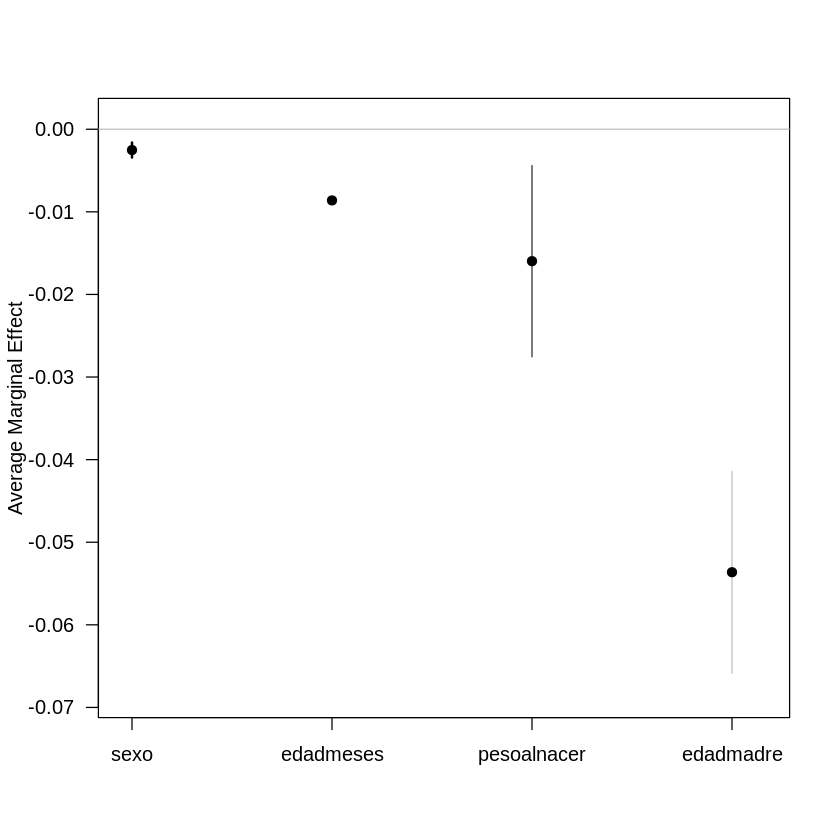

In [ ]:
#margins(plog)
summary(margins(plog))
plot(margins(plog))

,HHID,HVIDX,HWIDX,BORD,sexo,pesoalnacer,edadmeses,edadniño012,edadniño1335,edadniño3659,⋯,dydx_sexo,dydx_edadmeses,dydx_pesoalnacer,dydx_edadmadre,Var_dydx_sexo,Var_dydx_edadmeses,Var_dydx_pesoalnacer,Var_dydx_edadmadre,_weights,_at_number
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,⋯,<mrgnlffc>,<mrgnlffc>,<mrgnlffc>,<mrgnlffc>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,000100301,2,1,1,0,3.73,30,0,1,0,⋯,-0.05988074,-0.009619562,-0.01782965,-0.002811488,4.682664e-05,5.058436e-08,4.190342e-05,2.552518e-07,NA,1
2,000100401,1,1,6,0,2.53,30,0,1,0,⋯,-0.06170372,-0.009912415,-0.01837244,-0.002897080,4.682664e-05,5.058436e-08,4.190342e-05,2.552518e-07,NA,1
3,000100801,2,1,4,1,2.00,30,0,1,0,⋯,-0.05614699,-0.009019753,-0.01671792,-0.002636184,4.682664e-05,5.058436e-08,4.190342e-05,2.552518e-07,NA,1
4,000104201,2,1,1,0,3.10,30,0,0,1,⋯,-0.06232499,-0.010012219,-0.01855743,-0.002926249,4.682664e-05,5.058436e-08,4.190342e-05,2.552518e-07,NA,1
5,000107001,1,1,2,1,2.90,30,0,1,0,⋯,-0.05463091,-0.008776201,-0.01626650,-0.002565001,4.682664e-05,5.058436e-08,4.190342e-05,2.552518e-07,NA,1
6,000205401,4,1,1,0,3.27,30,0,0,1,⋯,-0.06330041,-0.010168916,-0.01884786,-0.002972047,4.682664e-05,5.058436e-08,4.190342e-05,2.552518e-07,NA,1
7,000206201,5,1,1,0,3.12,30,0,0,1,⋯,-0.05926378,-0.009520450,-0.01764595,-0.002782521,4.682664e-05,5.058436e-08,4.190342e-05,2.552518e-07,NA,1
8,000207301,2,1,2,0,2.60,30,0,0,1,⋯,-0.05905763,-0.009487333,-0.01758456,-0.002772842,4.682664e-05,5.058436e-08,4.190342e-05,2.552518e-07,NA,1
9,000207901,2,1,2,1,3.82,30,0,0,1,⋯,-0.05236507,-0.008412205,-0.01559184,-0.002458617,4.682664e-05,5.058436e-08,4.190342e-05,2.552518e-07,NA,1


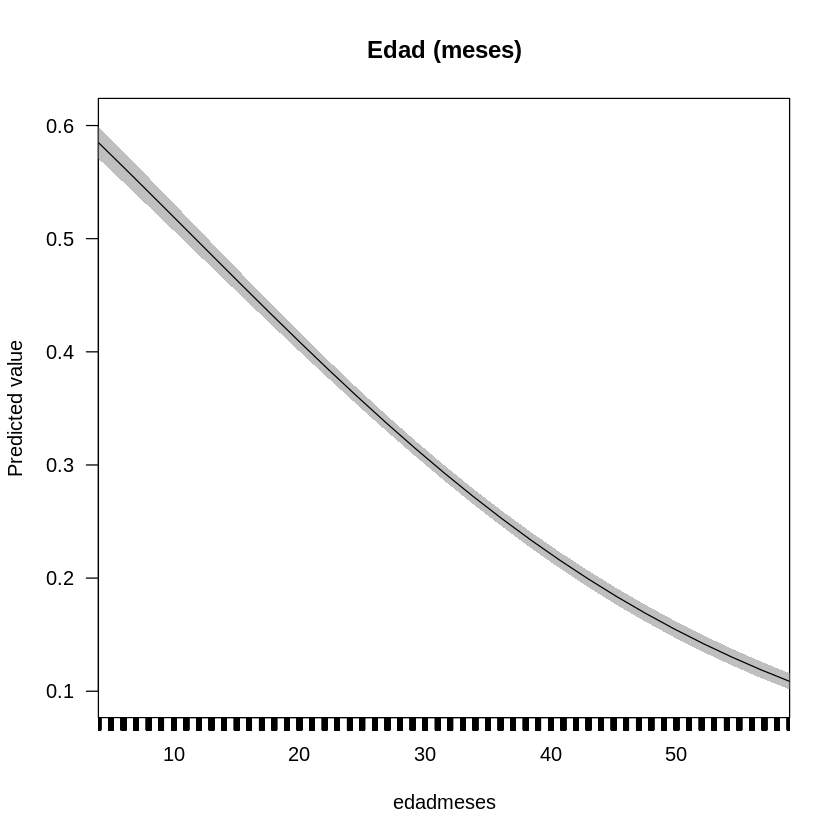

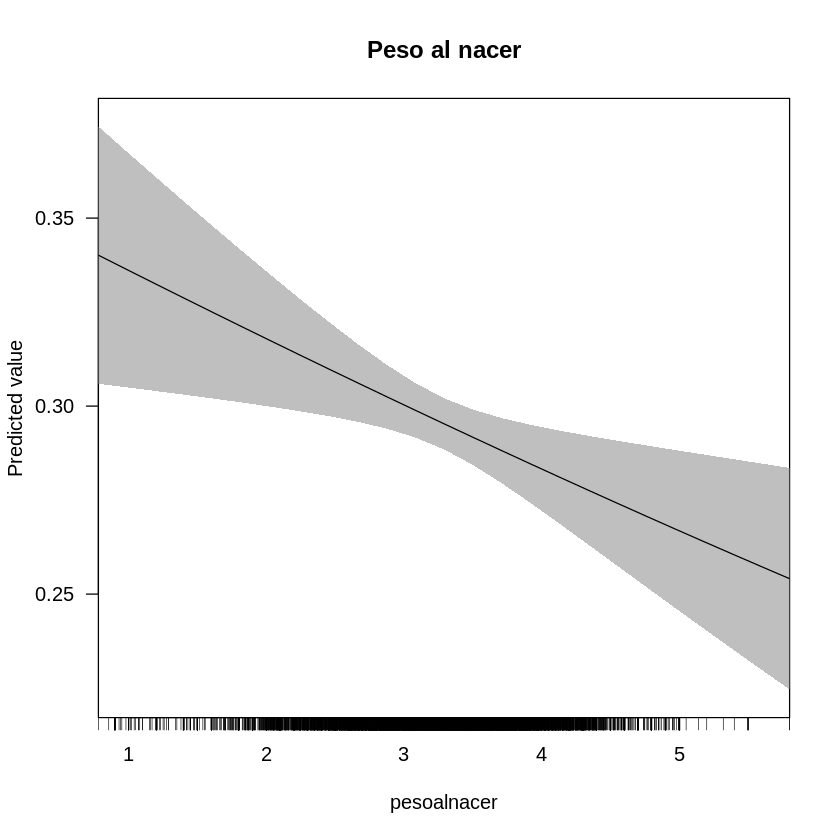

In [ ]:
margins(plog, at = list(edadmeses = 30:40))
cplot(plog, "edadmeses", what = "prediction", main = "Edad (meses)")
cplot(plog, "pesoalnacer", what = "prediction", main = "Peso al nacer")

## **Efectos Marginales**

In [ ]:
install.packages("mfx")    # Efectos marginales
library("mfx")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘flexmix’, ‘Formula’, ‘modeltools’, ‘sandwich’, ‘betareg’


Loading required package: sandwich

Loading required package: betareg



In [ ]:
# Efectos Marginales de OLS
OLS_Marginal2<- coef(mod_ols)
OLS_Marginal2

(Intercept)                  sexo             edadmeses 
          0.786610852          -0.049966770          -0.008826884 
          pesoalnacer             edadmadre    factor(educmadre)1 
          0.001608227          -0.001453351           0.002979548 
   factor(educmadre)2  factor(lengmaterna)1  factor(lengmaterna)2 
         -0.027161324          -0.094123299          -0.098978757 
          anemiamadre                  area factor(wealth_index)2 
          0.123812749           0.018812141          -0.050432726 
factor(wealth_index)3 factor(wealth_index)4 factor(wealth_index)5 
         -0.109013812          -0.148437455          -0.182383101

In [ ]:
# Efectos marginales promedio del modelo Logit
LogitMarginal2 <- logitmfx(d_anemia ~ sexo + edadmeses + pesoalnacer + edadmadre + factor(educmadre) + 
  factor(lengmaterna) + anemiamadre + area + factor(wealth_index), 
                           data=base, atmean=TRUE, robust=TRUE)
LogitMarginal2

Call:
logitmfx(formula = d_anemia ~ sexo + edadmeses + pesoalnacer + 
    edadmadre + factor(educmadre) + factor(lengmaterna) + anemiamadre + 
    area + factor(wealth_index), data = base, atmean = TRUE, 
    robust = TRUE)

Marginal Effects:
                            dF/dx   Std. Err.        z     P>|z|    
sexo                  -0.05461041  0.00703395  -7.7638 8.240e-15 ***
edadmeses             -0.00945329  0.00023129 -40.8729 < 2.2e-16 ***
pesoalnacer            0.00198066  0.00665148   0.2978  0.765873    
edadmadre             -0.00160318  0.00053695  -2.9857  0.002829 ** 
factor(educmadre)1     0.00263932  0.01011985   0.2608  0.794242    
factor(educmadre)2    -0.03093550  0.01153869  -2.6810  0.007340 ** 
factor(lengmaterna)1  -0.09940378  0.01454120  -6.8360 8.143e-12 ***
factor(lengmaterna)2  -0.08724111  0.06180770  -1.4115  0.158099    
anemiamadre            0.13576014  0.00974588  13.9300 < 2.2e-16 ***
area                   0.01867413  0.01026730   1.8188  0.068942 . 

In [ ]:
# Efectos marginales promedio del modelo Probit
ProbitMarginal2 <- probitmfx(d_anemia ~ sexo + edadmeses + pesoalnacer + edadmadre + factor(educmadre) + 
  factor(lengmaterna) + anemiamadre + area + factor(wealth_index), 
                             data=base, atmean=TRUE, robust=TRUE)
ProbitMarginal2

Call:
probitmfx(formula = d_anemia ~ sexo + edadmeses + pesoalnacer + 
    edadmadre + factor(educmadre) + factor(lengmaterna) + anemiamadre + 
    area + factor(wealth_index), data = base, atmean = TRUE, 
    robust = TRUE)

Marginal Effects:
                            dF/dx   Std. Err.        z     P>|z|    
sexo                  -0.05362455  0.00702010  -7.6387 2.194e-14 ***
edadmeses             -0.00938073  0.00023021 -40.7486 < 2.2e-16 ***
pesoalnacer            0.00214154  0.00663112   0.3230  0.746730    
edadmadre             -0.00153714  0.00053577  -2.8690  0.004117 ** 
factor(educmadre)1     0.00373188  0.01016011   0.3673  0.713390    
factor(educmadre)2    -0.02893131  0.01160289  -2.4935  0.012651 *  
factor(lengmaterna)1  -0.09792584  0.01425742  -6.8684 6.492e-12 ***
factor(lengmaterna)2  -0.08960492  0.06586305  -1.3605  0.173680    
anemiamadre            0.13455121  0.00950080  14.1621 < 2.2e-16 ***
area                   0.01785070  0.01038928   1.7182  0.085763 .